In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import cv2
import time
from skimage import morphology
import seaborn as sns
from skimage import morphology
import scipy.ndimage as ndimage
plt.rcParams['figure.figsize'] = (20,12)
%config InlineBackend.figure_format = 'retina'


In [36]:
def remove_small(image):
    labels_bi, nbr_objects_bi = ndimage.measurements.label(image)

    areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
    mask = areas > 10
    remove_small_gomi = mask[labels_bi]
    return remove_small_gomi.astype(int)

In [37]:
def main(file_name):
    threshold_P = 8
    threshold_M = 0

    PDZD8 = cv2.imread(file_name + "C2.tif",cv2.IMREAD_ANYDEPTH)
    Mito = cv2.imread(file_name + "C1.tif",cv2.IMREAD_ANYDEPTH)
    ROI = cv2.imread(file_name + "ROI.tif",cv2.IMREAD_ANYDEPTH)
    ROI = (ROI).astype('uint16')
    PDZD8 = PDZD8*ROI
    Mito = Mito*ROI

    # Making binary images
    ret_P ,th_P = cv2.threshold(PDZD8,threshold_P,65535,cv2.THRESH_BINARY)
    th_P = th_P/65535
    ret_M, th_M = cv2.threshold(Mito,threshold_M,65535,cv2.THRESH_OTSU) #YFP-ActAのtfxなのでOTSUが良い。
    ret_M ,th_M = cv2.threshold(Mito,ret_M*1.2, 65535,cv2.THRESH_BINARY)
    #ret_M ,th_M = cv2.threshold(Mito},threshold_M,65535,cv2.THRESH_BINARY)

    th_M = th_M/65535
    th_M = remove_small(th_M) #小さいの除く。

    PDZD8 = (PDZD8 - threshold_P)*th_P
    Mito = (Mito-ret_M)*th_M
    
    # Converting to 8bit image
    th_P = (th_P).astype('uint8')
    th_M = (th_M).astype('uint8')

                
                             
    PDZD8_on_Mito = np.sum(PDZD8*th_M)/np.sum(PDZD8) 

    
    
    
    return PDZD8_on_Mito

In [38]:
df = pd.DataFrame(data=None, index=None, columns= ["PDZD8_on_Mito"], dtype=None, copy=False)

low_PDZD8_cell_numbers =  [
    3,
5,
9,
10,
13,
15,
17,
18,
19,
22,
29,
41,
47,
49,
51,
52,
53,
58,
59
]


for i in range(1,62):
    if i in low_PDZD8_cell_numbers:
        print(i)
    else:
        file_name = r"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_" + str(i).zfill(3) +" - Deconvolved, Type Automatic.nd2_Z3_"
        df.loc[file_name] = main(file_name)
  

/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

3
5


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

9
10
13
15


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

17
18
19
22


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

29


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

41


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

47
49


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

51
52
53


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

58
59


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

In [6]:
df

,MOC,K1,K2,PDZD8_on_Mito,Mito_on_PDZD8,PDZD8_intensity_per_mito_area
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_001 - Deconvolved, Type Automatic.nd2_Z3_",0.071470,5.671998,0.669332,0.233890,0.117494,0.721922
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_002 - Deconvolved, Type Automatic.nd2_Z3_",0.055914,5.028705,0.494695,0.186852,0.086039,0.544661
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_004 - Deconvolved, Type Automatic.nd2_Z3_",0.068442,5.812055,0.358672,0.268240,0.075183,0.390374
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_006 - Deconvolved, Type Automatic.nd2_Z3_",0.080570,4.818880,0.608371,0.259020,0.095472,0.596817
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_007 - Deconvolved, Type Automatic.nd2_Z3_",0.119508,3.744809,1.218488,0.335128,0.138777,0.959119
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_008 - Deconvolved, Type Automatic.nd2_Z3_",0.083945,6.637744,0.660636,0.249243,0.106696,0.667977
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_011 - Deconvolved, Type Automatic.nd2_Z3_",0.075600,3.773776,0.850523,0.203095,0.105445,0.893117
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_012 - Deconvolved, Type Automatic.nd2_Z3_",0.063543,3.641505,0.775992,0.179717,0.102744,0.811356
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_014 - Deconvolved, Type Automatic.nd2_Z3_",0.047435,3.975281,0.339204,0.198144,0.055019,0.378998
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_3_KI_Control_016 - Deconvolved, Type Automatic.nd2_Z3_",0.060225,5.935624,0.320025,0.218851,0.060168,0.295256


In [39]:
df_1 = pd.DataFrame(data=None, index=None, columns=  ["PDZD8_on_Mito"], dtype=None, copy=False)

low_PDZD8_cell_numbers =  [1,
4,
5,
6,
7,
9,
10,
12,
13,
15,
16,
18,
19,
20,
21,
22,
24,
26,
27,
28,
29,
30,
31,
36,
37,
39,
40,
42,
43,
45]

for i in range(1,46):
    if i in low_PDZD8_cell_numbers:
        print(i)
    else:
        file_name = r"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_" + str(i).zfill(3) +" - Deconvolved, Type Automatic.nd2_Z3_"
        df_1.loc[file_name] = main(file_name)


1


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

4
5
6
7
9
10


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

12
13
15
16


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

18
19
20
21
22
24


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

26
27
28
29
30
31


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

36
37
39
40


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypy

42
43
45


/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:2: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labels_bi, nbr_objects_bi = ndimage.measurements.label(image)
/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_12686/2047046221.py:4: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  areas = np.array(ndimage.measurements.sum(image, labels_bi, np.arange(labels_bi.max()+1)))


In [40]:
df_1 

,PDZD8_on_Mito
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_002 - Deconvolved, Type Automatic.nd2_Z3_",0.168764
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_003 - Deconvolved, Type Automatic.nd2_Z3_",0.296836
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_008 - Deconvolved, Type Automatic.nd2_Z3_",0.449821
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_011 - Deconvolved, Type Automatic.nd2_Z3_",0.442333
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_014 - Deconvolved, Type Automatic.nd2_Z3_",0.207531
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_017 - Deconvolved, Type Automatic.nd2_Z3_",0.469664
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_023 - Deconvolved, Type Automatic.nd2_Z3_",0.311301
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_025 - Deconvolved, Type Automatic.nd2_Z3_",0.253669
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_032 - Deconvolved, Type Automatic.nd2_Z3_",0.361202
"/Volumes/Nakamura/Exp506/simple_deconv_tif/240418_KN506_4_KI_HA-FKBP8N03K_033 - Deconvolved, Type Automatic.nd2_Z3_",0.262783


In [41]:
df["condition"] = "Ctrl"
df_1["condition"] = "FKBP8_OE"

In [42]:
df1 = pd.concat([df, df_1])

In [44]:
Y = "PDZD8_on_Mito"
print(smirnov_grubbs(df1[df1["condition"]=="Ctrl"][Y],0.05))
print(smirnov_grubbs(df1[df1["condition"]=="FKBP8_OE"][Y],0.05))

(array([0.23388989, 0.18685241, 0.26823975, 0.25902014, 0.33512791,
       0.24924317, 0.20309546, 0.17971717, 0.19814364, 0.2188513 ,
       0.24952673, 0.19463407, 0.24355155, 0.21856795, 0.35609477,
       0.23825111, 0.20543974, 0.15640898, 0.31642087, 0.19888572,
       0.2020519 , 0.10803357, 0.21688853, 0.20612936, 0.28985494,
       0.18179692, 0.22691432, 0.21562986, 0.31652644, 0.21905687,
       0.11126856, 0.10928135, 0.22848572, 0.13943341, 0.16556174,
       0.15583991, 0.130198  , 0.20107088, 0.25161583, 0.31304007,
       0.22122467]), array([0.4530543]))
(array([0.16876388, 0.29683626, 0.44982072, 0.44233253, 0.20753144,
       0.46966404, 0.31130096, 0.25366946, 0.3612015 , 0.26278337,
       0.25060227, 0.17451659, 0.23662889, 0.21690221, 0.40828642]), array([], dtype=float64))


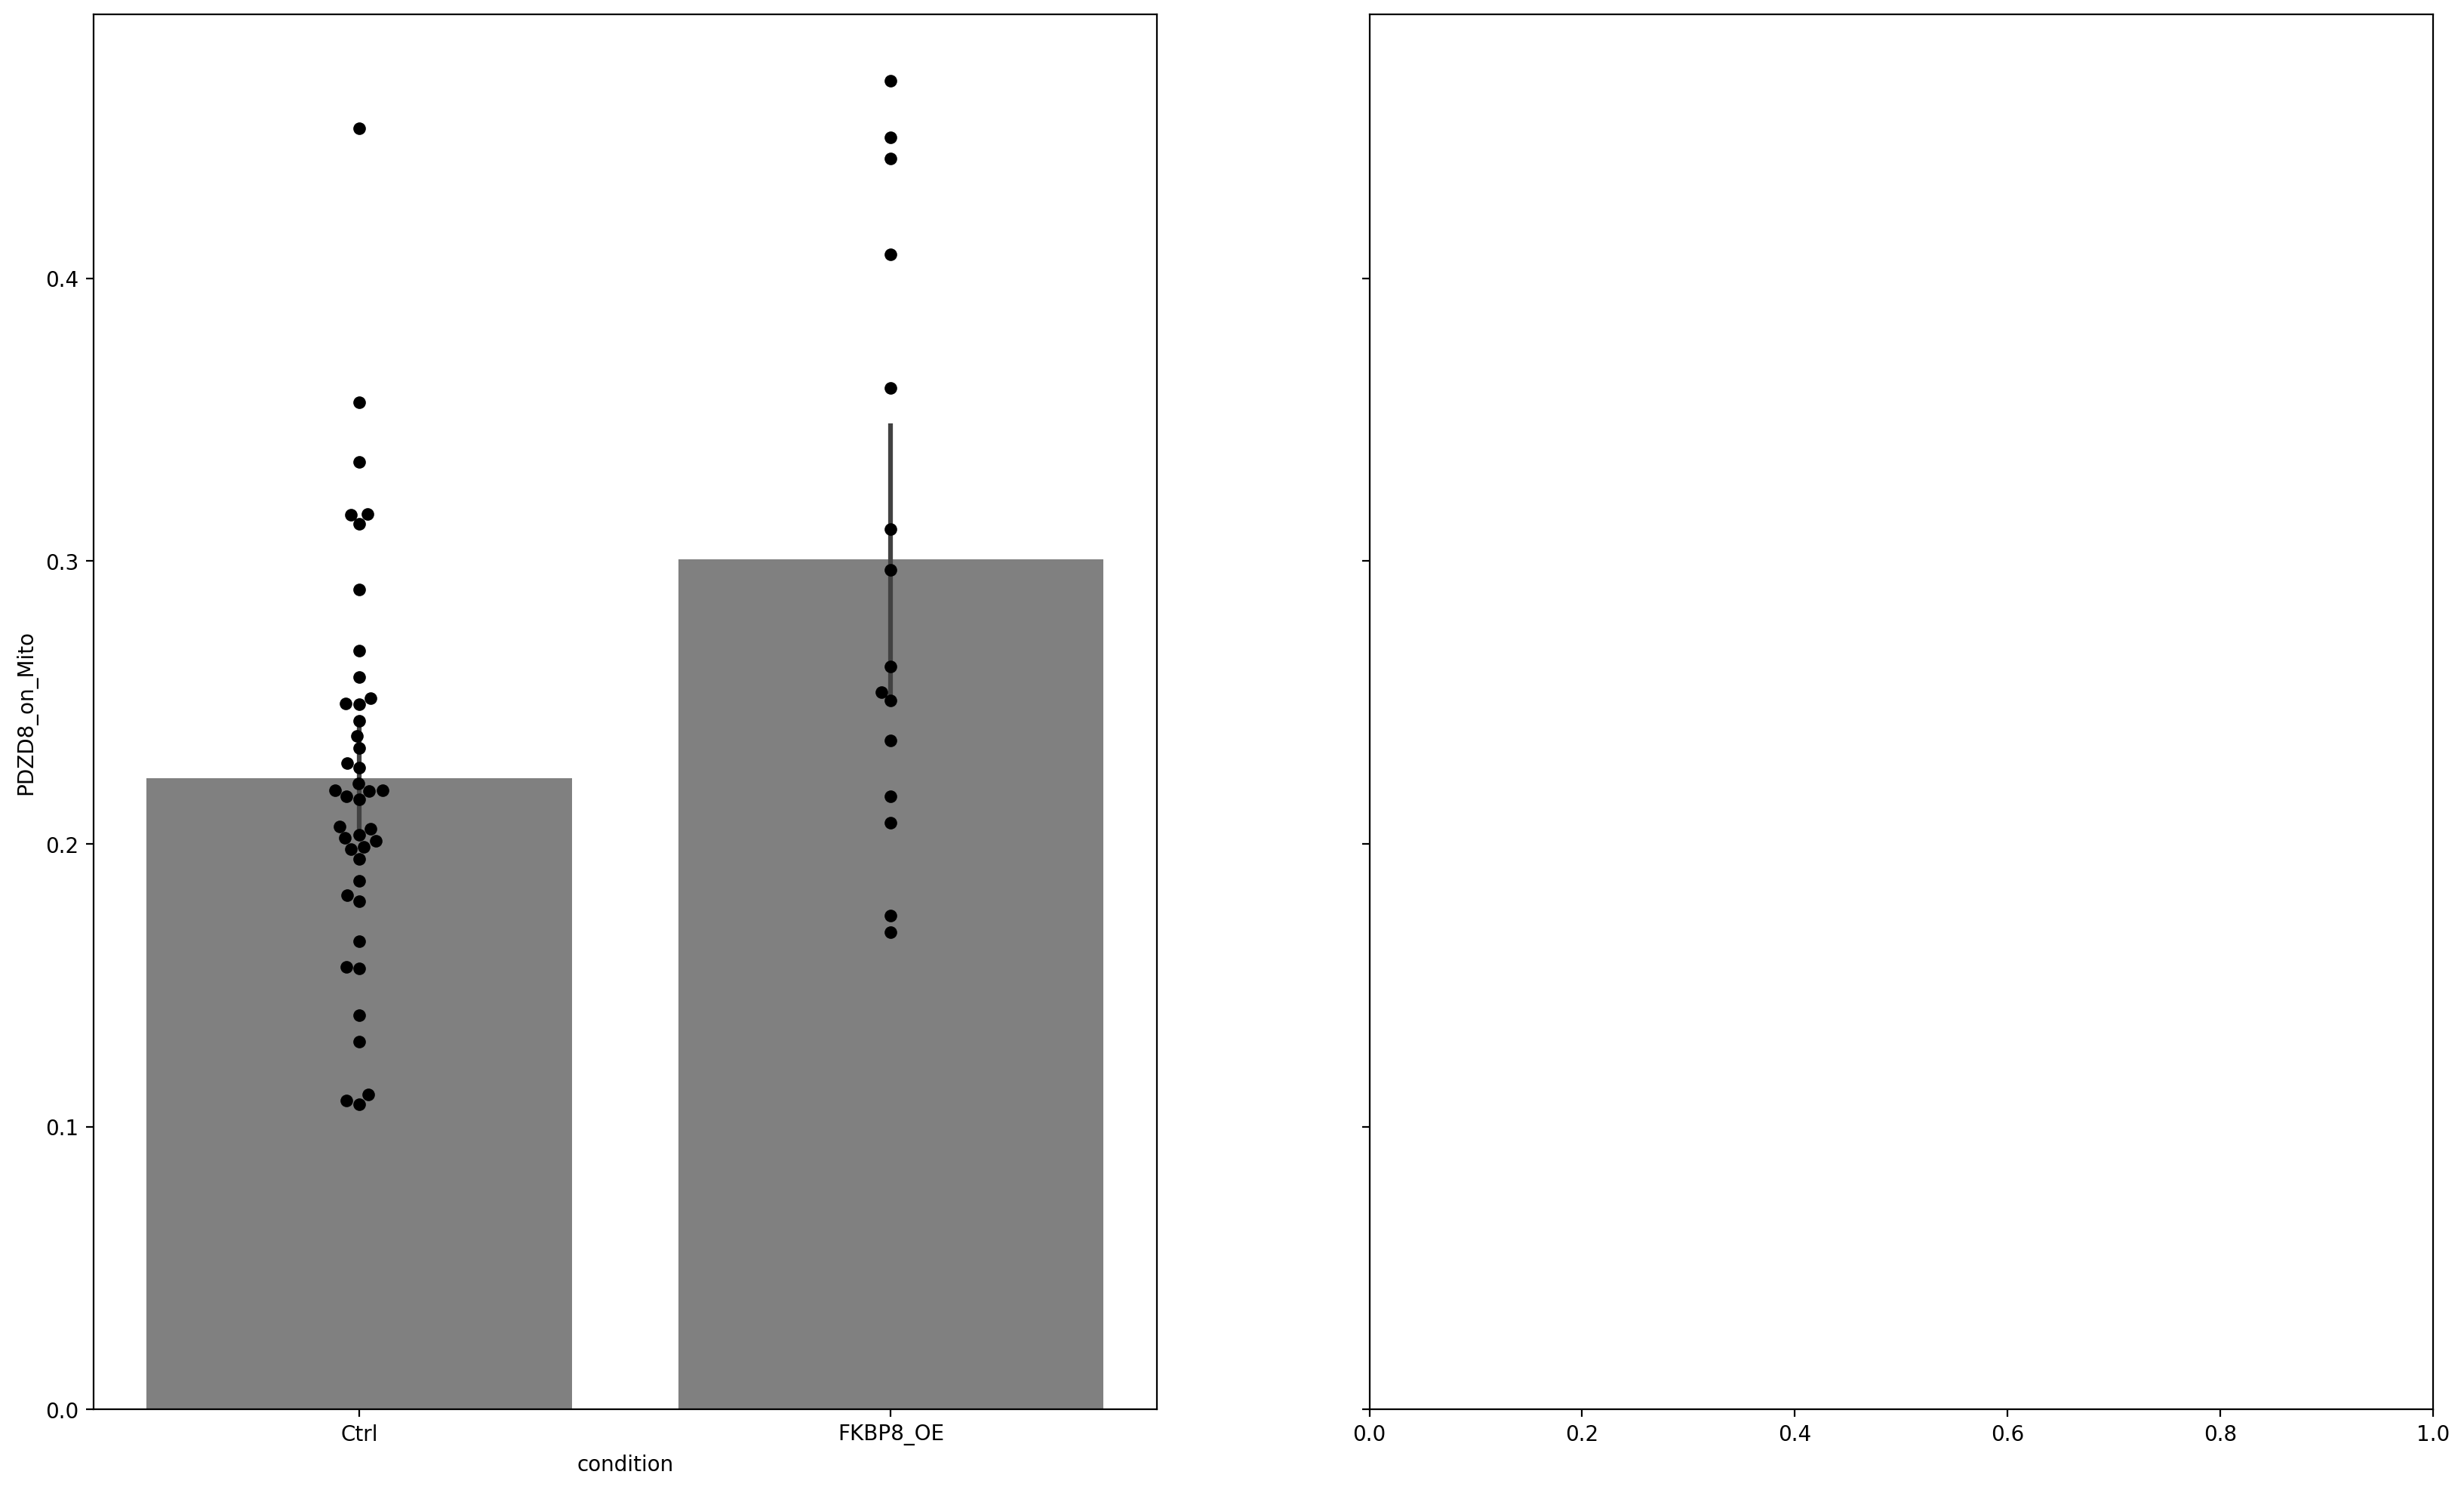

In [45]:
Y = "PDZD8_on_Mito"
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for (Y, AX) in zip([Y], [ax1]):
    sns.barplot(data = df1, y = Y, x = "condition", color = "gray", ax=AX)
    sns.swarmplot(data = df1, color="black",y = Y, x = "condition", size = 6 ,ax = AX)

In [46]:
from scipy import stats
import itertools
Condition_list = df1["condition"].unique()
print(Y)
for A, B in itertools.combinations(Condition_list, 2):
    print(stats.mannwhitneyu(df1[df1["condition"]==A][Y], df1[df1["condition"]==B][Y], alternative='two-sided'))
    print(stats.ttest_ind(df1[df1["condition"]==A][Y], df1[df1["condition"]==B][Y], equal_var=True))
    print(stats.ttest_ind(df1[df1["condition"]==A][Y], df1[df1["condition"]==B][Y], equal_var=False))


PDZD8_on_Mito
MannwhitneyuResult(statistic=169.0, pvalue=0.008370391110121013)
TtestResult(statistic=-3.2767941979912267, pvalue=0.0018217781264978532, df=55.0)
TtestResult(statistic=-2.7316148756781873, pvalue=0.013346018305865147, df=18.780038019884035)


In [47]:
print(Y)
for A, B in itertools.combinations(Condition_list, 2):
    print(A)
    print(np.mean(df1[df1["condition"]==A][Y]))
    print(B)
    
    print(np.mean(df1[df1["condition"]==B][Y]))

PDZD8_on_Mito
Ctrl
0.22316474959212118
FKBP8_OE
0.3007227028240782
